Follow [this](https://perfetto.dev/docs/quickstart/trace-analysis) link for more understanding on counter trackers. We need tracker indexes for modem, frontend, mmWave and display (for benchmarking). Groupings:

    1. Cellular: 'power.rails.modem': 2 + 'power.rails.radio.frontend': 3 + 'power.rails.VSYS_PWR_MMWAVE_uws': 1
    2. Display: 'power.rails.display': 13
    3. Compute: 'power.rails.cpu.big', 'power.rails.cpu.small','power.rails.cpu.mid': 5,6,7,10,16
    4. Memory Access: 'power.rails.memory.interface', 

In [21]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt


tp_list= []

# tp_list.append(TraceProcessor(trace='trace_5M_band2_delsol_30sec_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band2_axiom_30sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band2_wework_30sec_0.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_delsol_standby_120sec_3.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_axiom_standby_120sec_2.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_wework_standby_120sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_1M_band48_atk_30sec_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band48_pool1_30sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band48_pool_30sec_0.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_1.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_youtube_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_insta_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_pokego_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_iperf_atk_0.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_iperf_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_iperf_atk_1.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_2.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='ping_trace_wifi_1M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_1M_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_0.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='ping_trace_wifi_100M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_youtube_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_youtube_0.perfetto-trace')) #10-15 dBm


# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_2.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='ping_trace_wifi_1M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_100M_0.perfetto-trace')) #10-15 dBm
exp=0
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Standby_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Inst_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_YouTube_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Clash_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Zoom_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm


# tp_list.append(TraceProcessor(trace='trace_youtube_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_atk_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_2.perfetto-trace')) #10-15 dBm

num_traces = len(tp_list)


# df_list_cleaned = [tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
#                    .as_pandas_dataframe().replace(np.nan,0)
#                    .values.tolist() for i in range(1,24)]

df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in range(1,24)] for tp in tp_list]
initial_offset = 2

reduced_pow_mat = np.zeros([num_traces,7])
# reduced_pow_mat = np.zeros([num_traces,8])

for tp_idx in range(num_traces):
    df_np = np.array(df_list_cleaned[tp_idx])
    df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
    df_np[:,:,0] = df_np[:,:,0]/1e9
    pow_meas_arr = np.zeros(24)
    for i in range(1,24):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
        avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
        pow_meas_arr[i-1] = avg_pow_indiv
#         print(str(i-1)+". Average Power (mW) for "+str(name_list[i-1])+": "+str(avg_pow_indiv)+" mW")

    # print(pow_meas_arr[0:2])

    cell_pow_idx = [0,1,2]
    cell_pow = np.sum(pow_meas_arr[cell_pow_idx])
    cpu_pow_idx = [4,5,6,10,16]
    cpu_pow = np.sum(pow_meas_arr[cpu_pow_idx])
    memory_pow_idx = [3,17,18]
    mem_pow = np.sum(pow_meas_arr[memory_pow_idx])
    display_pow_idx = [12]
    display_pow = np.sum(pow_meas_arr[display_pow_idx])
    wifi_pow_idx = [13]
    wifi_pow =np.sum(pow_meas_arr[wifi_pow_idx])
#     LLDO_pow_idx = [8,11,22]
#     LLDO_pow = np.sum(pow_meas_arr[LLDO_pow_idx])
    camera_pow_idx = [14,15]
    camera_pow = np.sum(pow_meas_arr[camera_pow_idx])
#     sensor_pow_idx = [14,15,21]
#     sensor_pow =np.sum(pow_meas_arr[sensor_pow_idx])
#     profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx+wifi_pow_idx+sensor_pow_idx+LLDO_pow_idx
#     profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx
    profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx+camera_pow_idx+wifi_pow_idx
    other_pow_idx = list(set(range(24)) - set(profiled_idxs))
    other_pow = np.sum(pow_meas_arr[other_pow_idx])
    print("Total power: "+str(np.sum(pow_meas_arr)))
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow]
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow,other_pow]
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow, camera_pow,other_pow]
    reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow, camera_pow, wifi_pow,other_pow]
    reduced_pow_mat[tp_idx,:] = reduced_arr
    
# print("Cellular power: "+str(cell_pow))
# print("CPU power: "+str(cpu_pow))
# print("Memory power: "+str(mem_pow))
# print("Display power: "+str(display_pow))
# print("LDO power: "+str(LLDO_pow))
# print("Sensor power: "+str(sensor_pow))
# print("WiFi power: "+str(wifi_pow))
# print("Other power: "+str(other_pow))
# print("Total power: "+str(np.sum(pow_meas_arr)))
# print("Total power Verif: "+str(np.sum([cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow])))

Total power: 885.4959832635984
Total power: 1886.5379748953974
Total power: 1309.900569037657
Total power: 1544.5576736401672
Total power: 4173.436301255229


0.4693761774462538


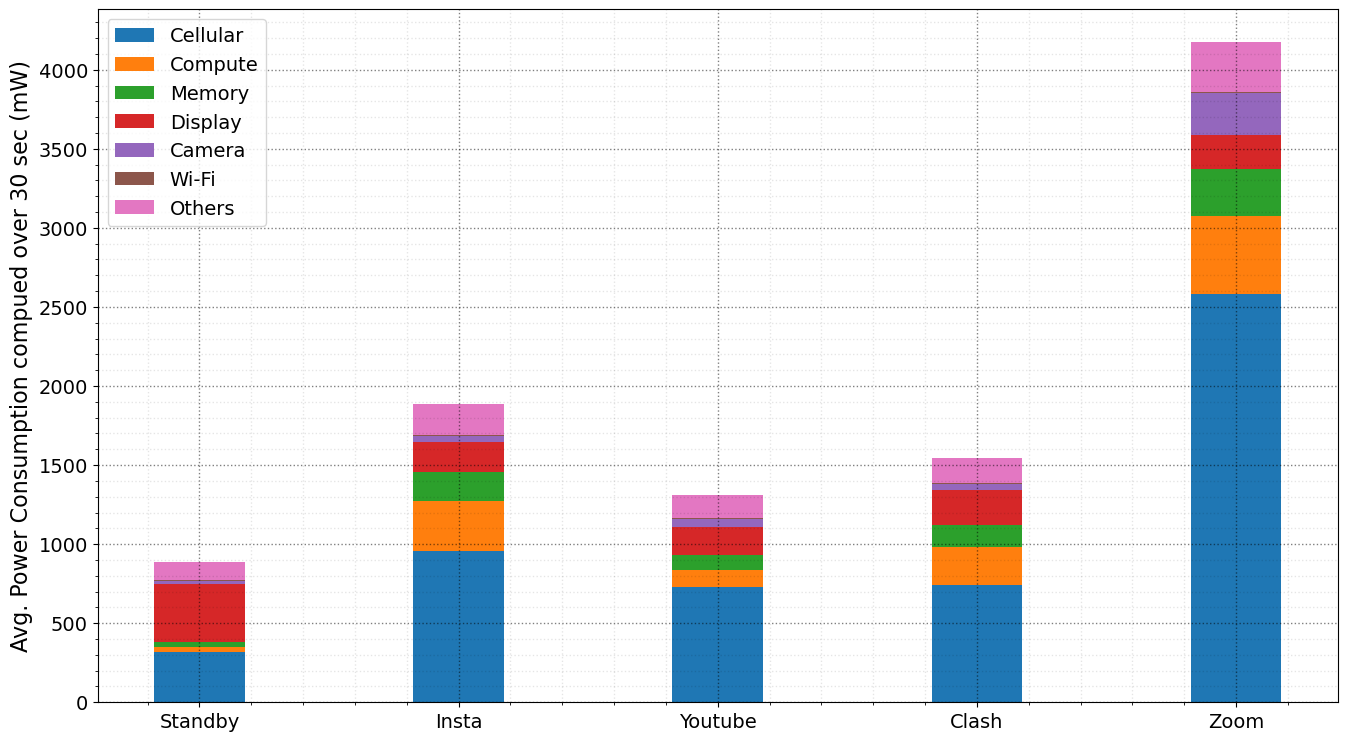

In [22]:
ind =  np.arange(num_traces)   
width = 0.35 

fig = plt.figure(figsize =(16,9))
# reduced_pow_mat[3,1] = 1.1*reduced_pow_mat[4,1]
p_list=[]
for i in range(7):
    if(i==0):
        p_list.append(plt.bar(ind, reduced_pow_mat[:,i], width))
    else:
#         print(i)
#         print(reduced_pow_mat[:,0:i-1])
#         print(np.sum(reduced_pow_mat[:,0:i-1],1))
        p_list.append(plt.bar(ind, reduced_pow_mat[:,i], width, bottom = np.sum(reduced_pow_mat[:,0:i],1)))
plt.ylabel('Avg. Power Consumption compued over 30 sec (mW)',fontsize=16)

# plt.xticks(ind, ('Youtube', 'Video Call','Instagram','PokemonGo','Standby'),fontsize=16)
# plt.xticks(ind, ('Youtube', 'Video Call','Instagram','PokemonGo','Standby', 'iPerf 5Mbps'),fontsize=16)
# plt.xticks(ind, ('Youtube Trial 1, 5G', 'Youtube Trial 2, 5G', 'Youtube Trial 3 5G',
#                  'Youtube Trial 1, Wi-Fi', 'Youtube Trial 2, Wi-Fi', 'Youtube Trial 3 Wi-Fi',),fontsize=16)
# plt.xticks(ind, ('Video Call Trial 1, 5G', 'Video Call Trial 2, 5G', 'Video Call Trial 3 5G',
#                  'Video Call Trial 1, Wi-Fi', 'Video Call Trial 2, Wi-Fi', 'Video Call Trial 3 Wi-Fi',),fontsize=16)
# plt.xticks(ind, ('5G Far', '5G Medium', '5G Close', '4G Far', '4G Medium', '4G Close'),fontsize=16)
# plt.xticks(ind, ('Red Location (500m)', 'Orange Location (300m)', 'Green Location (100m)'),fontsize=16)
# plt.xticks(ind, ('4G Far', '4G Medium', '4G Close'),fontsize=16)
# plt.xticks(ind, ('Wifi 1Mbps', 'Cellular 1Mbps', 'Wifi 10Mbps','Cellular 10Mbps','Wifi Youtube 1080p','Cellular Youtube 1080p'),fontsize=16)
# plt.xticks(ind, ('Wifi 1Mbps', 'Wifi 10Mbps','Wifi 100Mbps'),fontsize=16)
plt.xticks(ind, ('Standby','Insta','Youtube','Clash','Zoom'),fontsize=16)
# plt.yticks(np.arange(0, 81, 10))
# cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow
# print(reduced_pow_mat[:,3])
total_pow = np.sum(reduced_pow_mat,1)
# plt.legend(p_list, ('Cellular','CPU','Memory','Display','LDO','Sensor','WiFi','Others'))
# plt.legend(p_list, ('Cellular','Compute','Memory','Display','Others'),fontsize=14)
plt.legend(p_list, ('Cellular','Compute','Memory','Display','Camera', 'Wi-Fi','Others'),fontsize=14)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(fontsize=10)
print(total_pow[0]/total_pow[1])
plt.savefig("./barplot_energy.pdf")
plt.show()

In [74]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt


tp_list= []

# tp_list.append(TraceProcessor(trace='trace_5M_band2_delsol_30sec_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band2_axiom_30sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band2_wework_30sec_0.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_delsol_standby_120sec_3.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_axiom_standby_120sec_2.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='trace_5M_band2_wework_standby_120sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_1M_band48_atk_30sec_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band48_pool1_30sec_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_5M_band48_pool_30sec_0.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_1.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_youtube_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_insta_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_pokego_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_standby_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_iperf_atk_0.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_iperf_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_iperf_atk_1.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_vidcall_atk_2.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='ping_trace_wifi_1M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_1M_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_0.perfetto-trace')) #10-15 dBm
# # tp_list.append(TraceProcessor(trace='ping_trace_wifi_100M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_youtube_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_youtube_0.perfetto-trace')) #10-15 dBm


# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_cellular_10M_2.perfetto-trace')) #10-15 dBm

# tp_list.append(TraceProcessor(trace='ping_trace_wifi_1M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_10M_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='ping_trace_wifi_100M_0.perfetto-trace')) #10-15 dBm
exp=1
# tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_win_hotspot_DL2_50_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_win_hotspot_UL_50_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_wifi_yt_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_wifi_zoom_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_YouTube_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Zoom_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_Zoom_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm


# tp_list.append(TraceProcessor(trace='trace_youtube_atk_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_atk_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_atk_2.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_0.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_1.perfetto-trace')) #10-15 dBm
# tp_list.append(TraceProcessor(trace='trace_youtube_wifi1_2.perfetto-trace')) #10-15 dBm

num_traces = len(tp_list)


# df_list_cleaned = [tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
#                    .as_pandas_dataframe().replace(np.nan,0)
#                    .values.tolist() for i in range(1,24)]

df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in range(1,24)] for tp in tp_list]
initial_offset = 2

reduced_pow_mat = np.zeros([num_traces,7])
# reduced_pow_mat = np.zeros([num_traces,8])

for tp_idx in range(num_traces):
    df_np = np.array(df_list_cleaned[tp_idx])
    df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
#     df_np[:,:,:,0] = df_np[:,:,:,0] - np.tile(df_np[:,:,0,0],[df_np.shape[2],1,1]).transpose(1,2,0) 
    df_np[:,:,0] = df_np[:,:,0]/1e9
    pow_meas_arr = np.zeros(24)
    for i in range(1,24):
        x_vals = df_np[i-1,:,0]
        y_vals = df_np[i-1,:,1]
        delta_y_vals = np.copy(y_vals)
        delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
        delta_y_vals[0] = 0
        avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
        pow_meas_arr[i-1] = avg_pow_indiv
#         print(str(i-1)+". Average Power (mW) for "+str(name_list[i-1])+": "+str(avg_pow_indiv)+" mW")

    # print(pow_meas_arr[0:2])

    cell_pow_idx = [0,1,2]
    cell_pow = np.sum(pow_meas_arr[cell_pow_idx])
    print(cell_pow)
    cpu_pow_idx = [4,5,6,10,16]
    cpu_pow = np.sum(pow_meas_arr[cpu_pow_idx])
    memory_pow_idx = [3,17,18]
    mem_pow = np.sum(pow_meas_arr[memory_pow_idx])
    display_pow_idx = [12]
    display_pow = np.sum(pow_meas_arr[display_pow_idx])
    wifi_pow_idx = [13]
    wifi_pow =np.sum(pow_meas_arr[wifi_pow_idx])
#     LLDO_pow_idx = [8,11,22]
#     LLDO_pow = np.sum(pow_meas_arr[LLDO_pow_idx])
    camera_pow_idx = [14,15]
    camera_pow = np.sum(pow_meas_arr[camera_pow_idx])
#     sensor_pow_idx = [14,15,21]
#     sensor_pow =np.sum(pow_meas_arr[sensor_pow_idx])
#     profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx+wifi_pow_idx+sensor_pow_idx+LLDO_pow_idx
#     profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx
    profiled_idxs = cell_pow_idx+cpu_pow_idx+memory_pow_idx+display_pow_idx+camera_pow_idx+wifi_pow_idx
    other_pow_idx = list(set(range(24)) - set(profiled_idxs))
    other_pow = np.sum(pow_meas_arr[other_pow_idx])
    print("Total power: "+str(np.sum(pow_meas_arr)))
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow]
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow,other_pow]
#     reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow, camera_pow,other_pow]
    reduced_arr = [cell_pow,cpu_pow,mem_pow,display_pow, camera_pow, wifi_pow,other_pow]
    reduced_pow_mat[tp_idx,:] = reduced_arr
    
# print("Cellular power: "+str(cell_pow))
# print("CPU power: "+str(cpu_pow))
# print("Memory power: "+str(mem_pow))
# print("Display power: "+str(display_pow))
# print("LDO power: "+str(LLDO_pow))
# print("Sensor power: "+str(sensor_pow))
# print("WiFi power: "+str(wifi_pow))
# print("Other power: "+str(other_pow))
# print("Total power: "+str(np.sum(pow_meas_arr)))
# print("Total power Verif: "+str(np.sum([cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow])))

60.35728870292887
Total power: 640.9505439330544
263.80148953974896
Total power: 2204.0808033472804
740.6829958158996
Total power: 1331.7456736401673
2835.8539414225943
Total power: 4318.4533054393305


0.29080174509013434


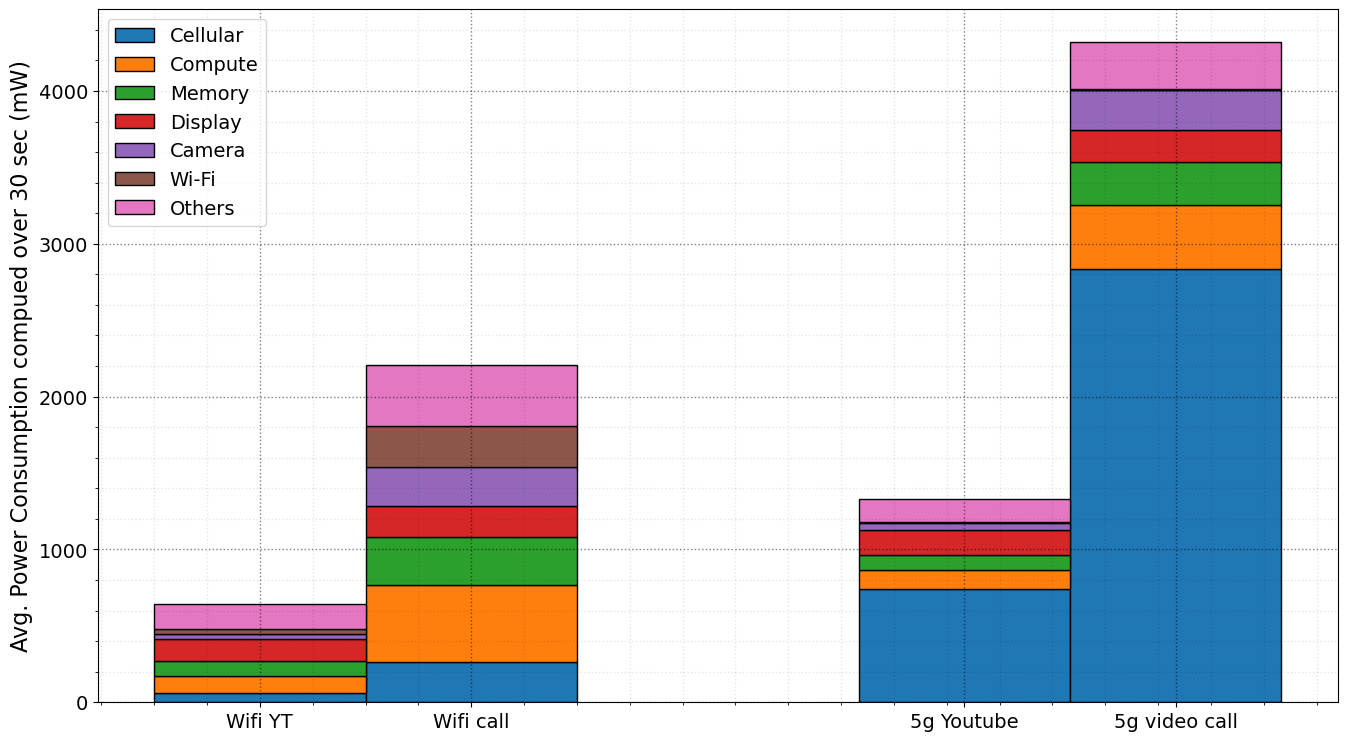

In [75]:
ind =  np.array([1-0.15,1+0.15,2-0.15,2+0.15])   
# ind =  np.array([1-3*0.15,1-0.15,1+0.15,1+3*0.15,2-3*0.15,2-0.15,2+0.15,2+3*0.15])   
width = 0.3 

fig = plt.figure(figsize =(16,9))
# reduced_pow_mat[3,1] = 1.1*reduced_pow_mat[4,1]
p_list=[]
for i in range(7):
    if(i==0):
        p_list.append(plt.bar(ind, reduced_pow_mat[:,i], width,edgecolor='k'))
    else:
#         print(i)
#         print(reduced_pow_mat[:,0:i-1])
#         print(np.sum(reduced_pow_mat[:,0:i-1],1))
        p_list.append(plt.bar(ind, reduced_pow_mat[:,i], width, bottom = np.sum(reduced_pow_mat[:,0:i],1),edgecolor='k'))
plt.ylabel('Avg. Power Consumption compued over 30 sec (mW)',fontsize=16)

# plt.xticks(ind, ('Youtube', 'Video Call','Instagram','PokemonGo','Standby'),fontsize=16)
# plt.xticks(ind, ('Youtube', 'Video Call','Instagram','PokemonGo','Standby', 'iPerf 5Mbps'),fontsize=16)
# plt.xticks(ind, ('Youtube Trial 1, 5G', 'Youtube Trial 2, 5G', 'Youtube Trial 3 5G',
#                  'Youtube Trial 1, Wi-Fi', 'Youtube Trial 2, Wi-Fi', 'Youtube Trial 3 Wi-Fi',),fontsize=16)
# plt.xticks(ind, ('Video Call Trial 1, 5G', 'Video Call Trial 2, 5G', 'Video Call Trial 3 5G',
#                  'Video Call Trial 1, Wi-Fi', 'Video Call Trial 2, Wi-Fi', 'Video Call Trial 3 Wi-Fi',),fontsize=16)
# plt.xticks(ind, ('5G Far', '5G Medium', '5G Close', '4G Far', '4G Medium', '4G Close'),fontsize=16)
# plt.xticks(ind, ('Red Location (500m)', 'Orange Location (300m)', 'Green Location (100m)'),fontsize=16)
# plt.xticks(ind, ('4G Far', '4G Medium', '4G Close'),fontsize=16)
# plt.xticks(ind, ('Wifi 1Mbps', 'Cellular 1Mbps', 'Wifi 10Mbps','Cellular 10Mbps','Wifi Youtube 1080p','Cellular Youtube 1080p'),fontsize=16)
# plt.xticks(ind, ('Wifi 1Mbps', 'Wifi 10Mbps','Wifi 100Mbps'),fontsize=16)
# plt.xticks(ind, ('Wifi DL','Wifi UL','Wifi call','Wifi YT','srsRAN DL','srs RAN UL','5g Youtube','5g video call'),fontsize=16)
plt.xticks(ind, ('Wifi YT','Wifi call','5g Youtube','5g video call'),fontsize=16)
# plt.yticks(np.arange(0, 81, 10))
# cell_pow,cpu_pow,mem_pow,display_pow,LLDO_pow,sensor_pow,wifi_pow,other_pow
# print(reduced_pow_mat[:,3])
total_pow = np.sum(reduced_pow_mat,1)
# plt.legend(p_list, ('Cellular','CPU','Memory','Display','LDO','Sensor','WiFi','Others'))
# plt.legend(p_list, ('Cellular','Compute','Memory','Display','Others'),fontsize=14)
plt.legend(p_list, ('Cellular','Compute','Memory','Display','Camera', 'Wi-Fi','Others'),fontsize=14)
# plt.title('Ratio vs #femto BS')
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(fontsize=10)
print(total_pow[0]/total_pow[1])
plt.savefig("./barplot_energy.pdf")
plt.show()